
 Resultados OCR (Mistral):

                                 Archivo  Word Error Rate  Word Accuracy  \
0        CV - Santiago Ramirez Prada.pdf            0.275          0.725   
1  CV - Juan Sebastian Rincon Bernal.pdf            0.286          0.714   
2         CV - Johana Ibañez Quiroga.pdf            0.268          0.732   
3   CV - David German Ramirez Rincon.pdf            0.274          0.726   

   Palabras OCR  Palabras Original  
0           108                102  
1           111                105  
2           118                112  
3           112                106  


/tmp/ipython-input-2152105201.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Archivo", y="Word Accuracy", palette="Blues_d")


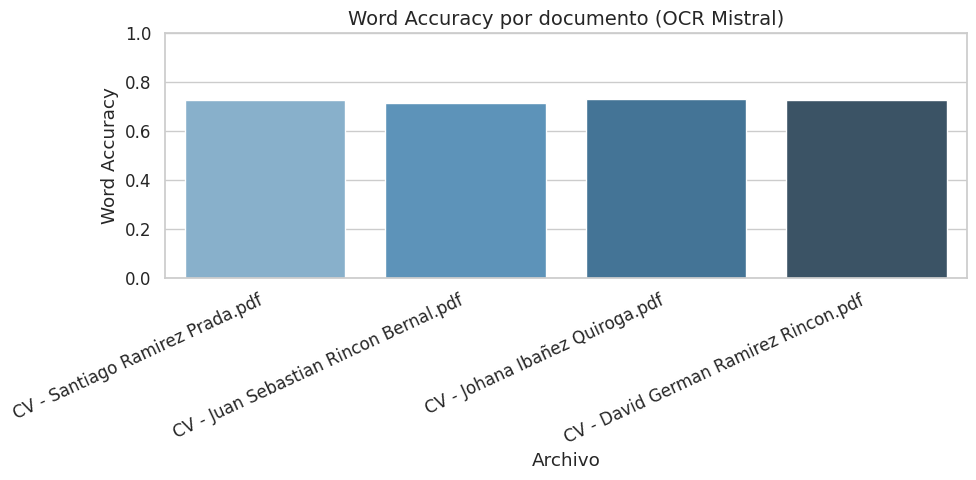

/tmp/ipython-input-2152105201.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Archivo", y="Word Error Rate", palette="Reds_d")


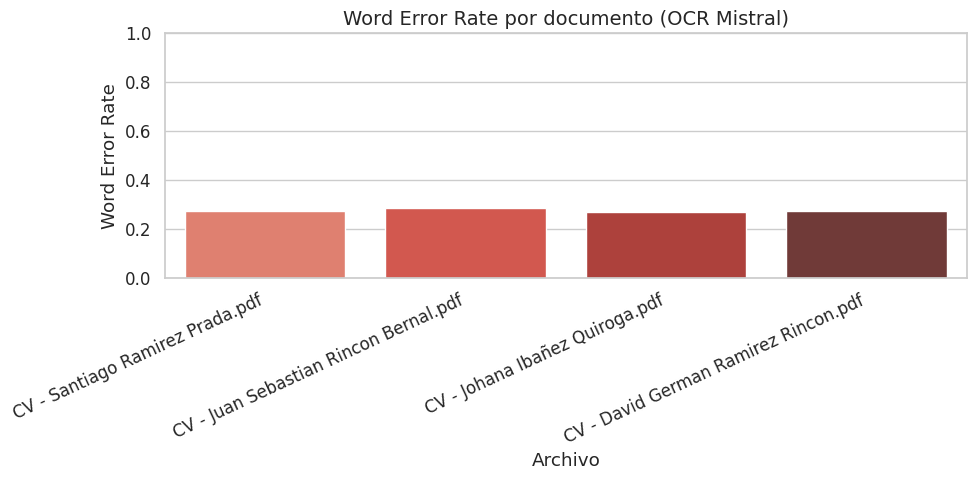


 Resultados exportados a ocr_mistral_results.csv


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jiwer import wer
from PyPDF2 import PdfReader

# 1️. CONFIGURACIÓN DE RUTAS

pdf_dir = "ground_truth_pdfs"

# 2️. DATOS OCR

ocr_texts = {
    "CV - Santiago Ramirez Prada.pdf": """
    # Santiago Ramirez Prada \n\nIdentidad: 109729\nPerfil: Automation / RPA\n\n## Perfil Profesional\n\nProfesional con experiencia en Automation / RPA. Capacidad para liderar proyectos, optimizar procesos y aportar soluciones innovadoras alineadas a los objetivos organizacionales.\n\n## Experiencia Laboral\n\n- Diseño e implementación de robots RPA para automatizar procesos repetitivos.\n- Reducción de tiempos de gestión administrativa mediante flujos automáticos.\n- Integración de bots con sistemas ERP y CRM.\n\n\n## Educación\n\nIngeniería de Sistemas - Universidad Ejemplo (2015 - 2020)\n\n## Habilidades Técnicas\n\n- Automatización de procesos\n- UiPath\n- Automation Anywhere\n- Python\n- Power Automate\n- Integración de sistemas\n\n\n## Idiomas\n\nEspañol - Nativo\nInglés - Intermedio.
    """,
    "CV - Juan Sebastian Rincon Bernal.pdf": """
    # Juan Sebastián Rincon Bernal \n\nidentidad: 110001\nPerfil: Infrastructure / Cloud\n\n## Perfil Profesional\n\nProfesional con experiencia en Infrastructure / Cloud. Capacidad para liderar proyectos, optimizar procesos y aportar soluciones innovadoras alineadas a los objetivos organizacionales.\n\n## Experiencia Laboral\n\n- Gestión y monitoreo de infraestructura en la nube con AWS y Azure.\n- Implementación de soluciones de virtualización y contenedores.\n- Configuración de redes seguras y despliegue de sistemas escalables.\n\n\n## Educación\n\nIngeniería de Sistemas - Universidad Ejemplo (2015 - 2020)\n\n## Habilidades Técnicas\n\n- Administración de servidores\n- AWS\n- Azure\n- Google Cloud\n- Docker\n- Kubernetes\n- Redes y seguridad\n\n\n## Idiomas\n\nEspañol - Nativo\nInglés - Intermedio.
    """,
    "CV - Johana Ibañez Quiroga.pdf": """
    # Johana Ibáñez Quiroga \n\nIdentidad: 50650\nPerfil: Software Development (Web, App, Backend, API)\n\n## Perfil Profesional\n\nProfesional con experiencia en Software Development (Web, App, Backend, API). Capacidad para liderar proyectos, optimizar procesos y aportar soluciones innovadoras alineadas a los objetivos organizacionales.\n\n## Experiencia Laboral\n\n- Desarrolladora Full Stack en proyectos de aplicaciones web y móviles.\n- Implementación de APIs REST para integración de sistemas internos.\n- Optimización de procesos en aplicaciones backend con Node.js y Django.\n\n\n## Educación\n\nIngeniería de Sistemas - Universidad Ejemplo (2015 - 2020)\n\n## Habilidades Técnicas\n\n- Desarrollo Web\n- Desarrollo Backend\n- APIs REST\n- Java\n- Python\n- JavaScript\n- Bases de Datos SQL/NoSQL\n\n\n## Idiomas\n\nEspañol - Nativo\nInglés - Intermedio.
    """,
    "CV - David German Ramirez Rincon.pdf": """
    # David Germán Ramirez Rincón \n\nIdentidad: 100814\nPerfil: BI / Analytics\n\n## Perfil Profesional\n\nProfesional con experiencia en BI / Analytics. Capacidad para liderar proyectos, optimizar procesos y aportar soluciones innovadoras alineadas a los objetivos organizacionales.\n\n## Experiencia Laboral\n\n- Desarrollo de tableros de control interactivos con Power BI.\n- Modelado de datos y procesos ETL para análisis de grandes volúmenes de información.\n- Implementación de soluciones de analítica predictiva.\n\n\n## Educación\n\nIngeniería de Sistemas - Universidad Ejemplo (2015 - 2020)\n\n## Habilidades Técnicas\n\n- Business Intelligence\n- Power BI\n- Tableau\n- SQL\n- ETL\n- Python para análisis de datos\n- Estadística\n\n\n## Idiomas\n\nEspañol - Nativo\nInglés - Intermedio
    """
}

# 3️. FUNCIONES AUXILIARES

def extract_text_from_pdf(path):
    """Extrae texto plano de un PDF."""
    text = ""
    with open(path, "rb") as f:
        reader = PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() or ""
    return text.replace("\n", " ").strip()

# 4️. PROCESAR DOCUMENTOS
results = []

for filename, ocr_text in ocr_texts.items():
    pdf_path = os.path.join(pdf_dir, filename)

    if not os.path.exists(pdf_path):
        print(f"No se encontró el PDF original para {filename}")
        continue

    # Texto original del PDF
    ground_truth = extract_text_from_pdf(pdf_path)

    # Calcular métricas
    w = wer(ground_truth, ocr_text)
    wa = 1 - w

    results.append({
        "Archivo": filename,
        "Word Error Rate": round(w, 3),
        "Word Accuracy": round(wa, 3),
        "Palabras OCR": len(ocr_text.split()),
        "Palabras Original": len(ground_truth.split())
    })

# Convertir a DataFrame
df = pd.DataFrame(results)
print("\n Resultados OCR (Mistral):\n")
print(df)

# 5️. VISUALIZACIONES

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Archivo", y="Word Accuracy", palette="Blues_d")
plt.title("Word Accuracy por documento (OCR Mistral)", fontsize=14)
plt.xticks(rotation=25, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Archivo", y="Word Error Rate", palette="Reds_d")
plt.title("Word Error Rate por documento (OCR Mistral)", fontsize=14)
plt.xticks(rotation=25, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 6️. EXPORTAR RESULTADOS

output_file = "ocr_mistral_results.csv"
df.to_csv(output_file, index=False)
print(f"\n Resultados exportados a {output_file}")
